In [1]:
cd ..

C:\Users\Abhi\Desktop\acads\5-2_Thesis\repos\Thesis_repos\Bachelor_Thesis


In [2]:
import numpy as np
import pickle
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import seaborn as sns
from model import ANN
from torch import nn
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from copy import deepcopy

## Load all data files


In [3]:
directory = 'Models/post_processed/'
X_raw_50 = np.load(file=directory+'50/X_raw.npy')
y_raw_50 = np.load(file=directory+'50/Y_raw.npy')
X_filtered_50 = np.load(file=directory+'50/X_filtered.npy')
y_filtered_50 = np.load(file=directory+'50/Y_filtered.npy')
with open(directory+'50/labels','rb') as fp:
    columns_50 = pickle.load(fp)
    

X_raw_100 = np.load(file=directory+'100/X_raw.npy')
y_raw_100 = np.load(file=directory+'100/Y_raw.npy')
X_filtered_100 = np.load(file=directory+'100/X_filtered.npy')
y_filtered_100 = np.load(file=directory+'100/Y_filtered.npy')
with open(directory+'100/labels','rb') as fp:
    columns_100 = pickle.load(fp)
   

X_raw_150 = np.load(file=directory+'150/X_raw.npy')
y_raw_150 = np.load(file=directory+'150/Y_raw.npy')
X_filtered_150 = np.load(file=directory+'150/X_filtered.npy')
y_filtered_150 = np.load(file=directory+'150/Y_filtered.npy')
with open(directory+'150/labels','rb') as fp:
    columns_150 = pickle.load(fp)
    

X_raw_200 = np.load(file=directory+'200/X_raw.npy')
y_raw_200 = np.load(file=directory+'200/Y_raw.npy')
X_filtered_200 = np.load(file=directory+'200/X_filtered.npy')
y_filtered_200 = np.load(file=directory+'200/Y_filtered.npy')
with open(directory+'200/labels','rb') as fp:
    columns_200 = pickle.load(fp)
    






## Analysis 1 

###  Visualize mutual information scores for each segment length

In [4]:
mi_scores_raw_50 = mutual_info_classif(X_raw_50,y_raw_50.ravel())
mi_scores_raw_50 = pd.Series(mi_scores_raw_50, name="Raw 50", index=columns_50)
mi_scores_filtered_50 = mutual_info_classif(X_filtered_50,y_filtered_50.ravel())
mi_scores_filtered_50 = pd.Series(mi_scores_filtered_50,name="Filtered 50",index=columns_50)

mi_scores_raw_100 = mutual_info_classif(X_raw_100,y_raw_100.ravel())
mi_scores_raw_100 = pd.Series(mi_scores_raw_100, name="Raw 100", index=columns_100)
mi_scores_filtered_100 = mutual_info_classif(X_filtered_100,y_filtered_100.ravel())
mi_scores_filtered_100 = pd.Series(mi_scores_filtered_100,name="Filtered 100",index=columns_100)

mi_scores_raw_150 = mutual_info_classif(X_raw_150,y_raw_150.ravel())
mi_scores_raw_150 = pd.Series(mi_scores_raw_150, name="Raw 150", index=columns_150)
mi_scores_filtered_150 = mutual_info_classif(X_filtered_150,y_filtered_150.ravel())
mi_scores_filtered_150 = pd.Series(mi_scores_filtered_150,name="Filtered 150",index=columns_150)

mi_scores_raw_200 = mutual_info_classif(X_raw_200,y_raw_200.ravel())
mi_scores_raw_200 = pd.Series(mi_scores_raw_200, name="Raw 200", index=columns_200)
mi_scores_filtered_200 = mutual_info_classif(X_filtered_200,y_filtered_200.ravel())
mi_scores_filtered_200 = pd.Series(mi_scores_filtered_200,name="Filtered 200",index=columns_200)



In [5]:
df_mi_scores = pd.concat([mi_scores_raw_50,
                          mi_scores_filtered_50,
                          mi_scores_raw_100,
                          mi_scores_filtered_100,
                          mi_scores_raw_150,
                          mi_scores_filtered_150,
                          mi_scores_raw_200,
                          mi_scores_filtered_200],axis=1)

<AxesSubplot:>

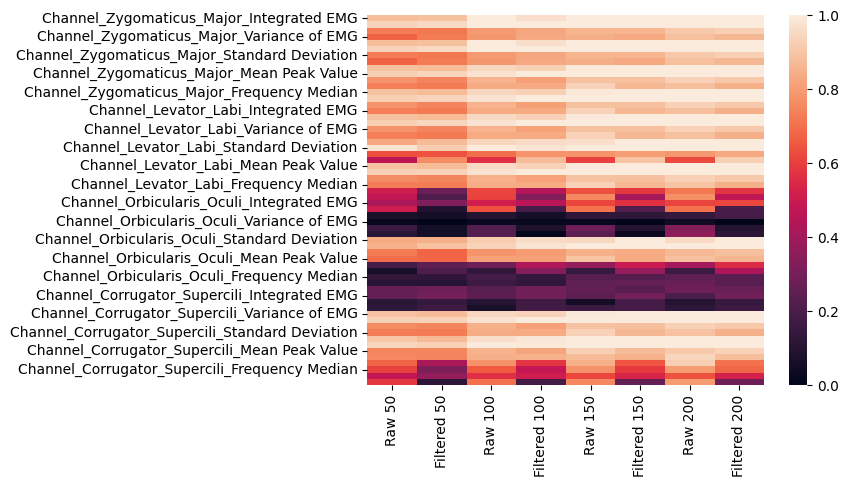

In [6]:
sns.heatmap(df_mi_scores,vmin=0,vmax=1,)

### Choose best 5 features by analysing heat map

## Analysis 2

### Visualize Model Performances

#### Training Artificial Neural Net (With All Features)

In [7]:
#Initializing models
ann_50_raw = ANN(X_raw_50,y_raw_50,'ANN 50 Raw')
ann_50_filtered = ANN(X_filtered_50,y_filtered_50,'ANN 50 Filtered')
ann_100_raw = ANN(X_raw_100,y_filtered_100,'ANN 100 Raw')
ann_100_filtered = ANN(X_filtered_100,y_raw_100,'ANN 100 Filtered')
ann_150_raw = ANN(X_raw_150,y_raw_150,'ANN 150 Raw')
ann_150_filtered = ANN(X_filtered_150,y_filtered_150,'ANN 150 Filtered')
ann_200_raw = ANN(X_raw_200,y_raw_200,'ANN 200 Raw')
ann_200_filtered = ANN(X_filtered_200,y_filtered_200,'ANN 200 FIltered')

In [8]:
print(f"Now Training for window length:50 Raw & Filtered")
print('Training Raw')
val_50_raw_losses = ann_50_raw.train()
print('Training Filtered')
val_50_filtered_losses = ann_50_filtered.train()
test_accuracy_50_raw = ann_50_raw.test()
test_accuracy_50_filtered = ann_50_filtered.test()

print(f"Now Training for window length:100 Raw & Filtered")
print('Training Raw')
val_100_raw_losses = ann_100_raw.train()
print('Training Filtered')
val_100_filtered_losses = ann_100_filtered.train()
test_accuracy_100_raw = ann_100_raw.test()
test_accuracy_100_filtered = ann_100_filtered.test()

print(f"Now Training for window length:150 Raw & Filtered")
print('Training Raw')
val_150_raw_losses = ann_150_raw.train()
print('Training Filtered')
val_150_filtered_losses = ann_150_filtered.train()
test_accuracy_150_raw = ann_150_raw.test()
test_accuracy_150_filtered = ann_150_filtered.test()

print(f"Now Training for window length:200 Raw & Filtered")
print('Training Raw')
val_200_raw_losses = ann_200_raw.train()
print('Training Filtered')
val_200_filtered_losses = ann_200_filtered.train()
test_accuracy_200_raw = ann_200_raw.test()
test_accuracy_200_filtered = ann_200_filtered.test()

Now Training for window length:50 Raw & Filtered
Training Raw
Fold 1:
Fold 2:
Fold 3:
Fold 4:
Fold 5:
Training Filtered
Fold 1:
Fold 2:
Fold 3:
Fold 4:
Fold 5:
Now Training for window length:100 Raw & Filtered
Training Raw
Fold 1:
Fold 2:
Fold 3:
Fold 4:
Fold 5:
Training Filtered
Fold 1:
Fold 2:
Fold 3:
Fold 4:
Fold 5:
Now Training for window length:150 Raw & Filtered
Training Raw
Fold 1:
Fold 2:
Fold 3:
Fold 4:
Fold 5:
Training Filtered
Fold 1:
Fold 2:
Fold 3:
Fold 4:
Fold 5:
Now Training for window length:200 Raw & Filtered
Training Raw
Fold 1:
Fold 2:
Fold 3:
Fold 4:
Fold 5:
Training Filtered
Fold 1:
Fold 2:
Fold 3:
Fold 4:
Fold 5:


#### Ploting losses

Text(0.5, 1.0, 'Validation Loss during Training')

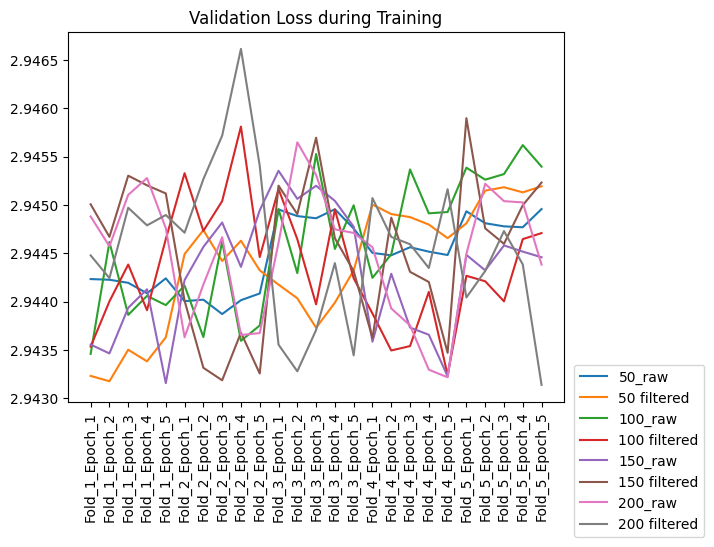

In [9]:
#ploting validation losses during the training phase
labels = list(val_50_raw_losses.keys())
plt.xticks(rotation=90)
plt.plot(labels,list(val_50_raw_losses.values()),label = '50_raw')
plt.plot(labels,list(val_50_filtered_losses.values()),label = '50 filtered')

plt.plot(labels,list(val_100_raw_losses.values()),label = '100_raw')
plt.plot(labels,list(val_100_filtered_losses.values()),label = '100 filtered')

plt.plot(labels,list(val_150_raw_losses.values()),label = '150_raw')
plt.plot(labels,list(val_150_filtered_losses.values()),label = '150 filtered')

plt.plot(labels,list(val_200_raw_losses.values()),label = '200_raw')
plt.plot(labels,list(val_200_filtered_losses.values()),label = '200 filtered')
plt.legend(bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)
plt.title('Validation Loss during Training')




Text(0.5, 1.0, 'Test Accuracy')

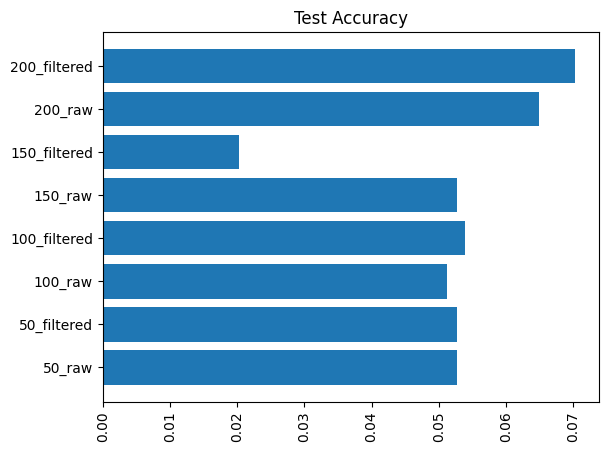

In [10]:
#plotting training accuracy
labels = ['50_raw','50_filtered','100_raw','100_filtered','150_raw','150_filtered','200_raw','200_filtered',]
plt.xticks(rotation=90)
y = [test_accuracy_50_raw,
     test_accuracy_50_filtered,
     test_accuracy_100_raw,
     test_accuracy_100_filtered,
     test_accuracy_150_raw,
     test_accuracy_150_filtered,
     test_accuracy_200_raw,
     test_accuracy_200_filtered]
plt.barh(labels,y)
plt.title('Test Accuracy')

[ 1.  2.  4.  5.  6.  7.  9. 10. 12. 14. 15. 17. 18. 20. 23. 24. 25. 26.
 43.]
Confusion Matrix for  ANN 50 Raw
[ 1.  2.  4.  5.  6.  7.  9. 10. 12. 14. 15. 17. 18. 20. 23. 24. 25. 26.
 43.]
Confusion Matrix for  ANN 100 Filtered
[ 1.  2.  4.  5.  6.  7.  9. 10. 12. 14. 15. 17. 18. 20. 23. 24. 25. 26.
 43.]
Confusion Matrix for  ANN 150 Filtered
[ 1.  2.  4.  5.  6.  7.  9. 10. 12. 14. 15. 17. 18. 20. 23. 24. 25. 26.
 43.]
Confusion Matrix for  ANN 200 FIltered


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '9'),
  Text(7, 0, '10'),
  Text(8, 0, '12'),
  Text(9, 0, '14'),
  Text(10, 0, '15'),
  Text(11, 0, '17'),
  Text(12, 0, '18'),
  Text(13, 0, '20'),
  Text(14, 0, '23'),
  Text(15, 0, '24'),
  Text(16, 0, '25'),
  Text(17, 0, '26'),
  Text(18, 0, '43')])

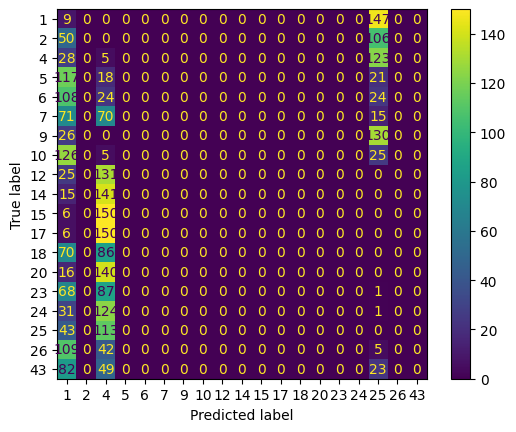

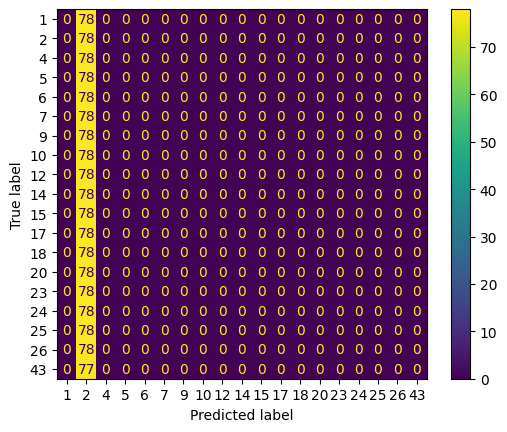

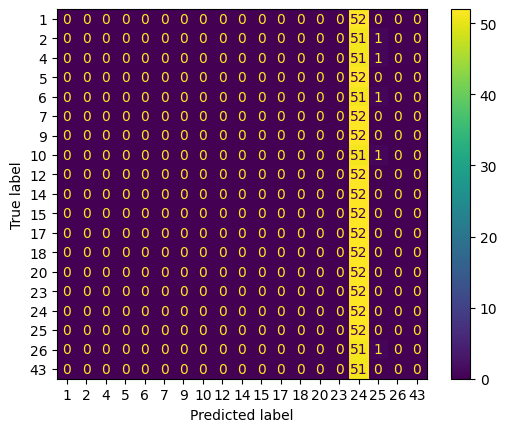

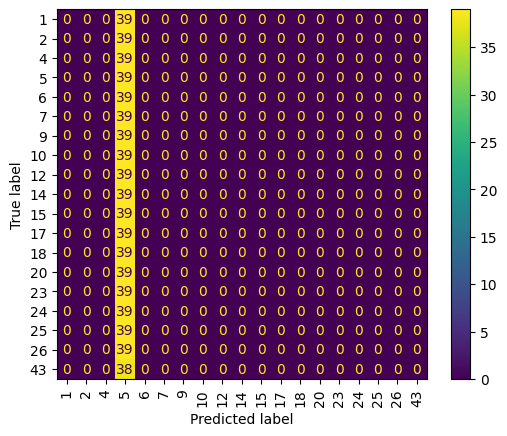

In [11]:
#plot confusion matrix
def get_confusion_matrix(X,y_true,model):
    X = torch.from_numpy(X).float()
    output = model.model(X)
    argmax = torch.argmax(output,dim=1)
    predictions = deepcopy(argmax)
    print(model.categories)
    for i in range(len(argmax)):
        index = argmax[i]
        predictions[i] = model.categories[index]
    cm = confusion_matrix(y_true,predictions,labels=model.categories)
    display = ConfusionMatrixDisplay(cm,display_labels=[int(i) for i in model.categories])
    print('Confusion Matrix for ',model.name)
    display.plot()

get_confusion_matrix(X_raw_50,y_raw_50,ann_50_raw)
get_confusion_matrix(X_filtered_100,y_raw_100,ann_100_filtered)
get_confusion_matrix(X_filtered_150,y_raw_150,ann_150_filtered)
get_confusion_matrix(X_filtered_200,y_raw_200,ann_200_filtered)
plt.xticks(rotation=90) 


In [12]:
#plot classification report
def get_classification_report(X,y_true,model,):
    X = torch.from_numpy(X).float()
    output = model.model(X)
    argmax = torch.argmax(output,dim=1)
    predictions = deepcopy(argmax)
    print(model.categories)
    for i in range(len(argmax)):
        index = argmax[i]
        predictions[i] = model.categories[index]
    cr = classification_report(y_true,predictions,target_names=[str(int(i)) for i in model.categories])
    print('Classification Report for ',model.name)
    print(cr)
get_classification_report(X_raw_50,y_raw_50,ann_50_raw)
get_classification_report(X_filtered_50,y_filtered_50,ann_50_filtered)
get_classification_report(X_raw_100,y_raw_100,ann_100_raw)
get_classification_report(X_filtered_100,y_filtered_100,ann_100_filtered)
get_classification_report(X_raw_150,y_raw_150,ann_150_raw)
get_classification_report(X_filtered_150,y_filtered_150,ann_150_filtered)
get_classification_report(X_raw_200,y_raw_200,ann_200_raw)
get_classification_report(X_filtered_50,y_filtered_50,ann_50_filtered)
    

[ 1.  2.  4.  5.  6.  7.  9. 10. 12. 14. 15. 17. 18. 20. 23. 24. 25. 26.
 43.]
Classification Report for  ANN 50 Raw
              precision    recall  f1-score   support

           1       0.01      0.06      0.02       156
           2       0.00      0.00      0.00       156
           4       0.00      0.03      0.01       156
           5       0.00      0.00      0.00       156
           6       0.00      0.00      0.00       156
           7       0.00      0.00      0.00       156
           9       0.00      0.00      0.00       156
          10       0.00      0.00      0.00       156
          12       0.00      0.00      0.00       156
          14       0.00      0.00      0.00       156
          15       0.00      0.00      0.00       156
          17       0.00      0.00      0.00       156
          18       0.00      0.00      0.00       156
          20       0.00      0.00      0.00       156
          23       0.00      0.00      0.00       156
          24      

C:\Users\Abhi\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abhi\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abhi\anaconda3\envs\Thesis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abhi\anaconda